# PART THREE

Using the scrabble data, reproduce the "Nigel Richards's Performance at Nationals" chart from FiveThirtyEight (minus the UFO bits). Build the basic chart from this dataframe:

    points_df  = pd.read_csv("scrabble-point-spread.csv")
    tournament_df = pd.read_csv("scrabble-tournament.csv")
    df = tournament_df.merge(points_df, left_on='Player ID', right_on='player_id').fillna(0)
    df.head()

Hot tip: You might want to start with matplotlib using the fivethirtyeight style. Check this blog post for info on how to make arrows.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import matplotlib
matplotlib.rcParams['pdf.fonttype']=42

/Users/apple/.virtualenvs/data-analysis/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/apple/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [2]:
points_df  = pd.read_csv("scrabble-point-spread.csv")
tournament_df = pd.read_csv("scrabble-tournament.csv")
df = tournament_df.merge(points_df, left_on='Player ID', right_on='player_id').fillna(0)
df.head()

,Byes,Credits,Losses,Name,New Rating,Old Rating,Other Money,Perf Rating,Place,Player ID,...,Seed,Spread,Ties,Tournament ID,Wins,division,player_id,points_against,points_for,tournament_id
0,0.0,0.0,7,Nigel Richards,2196,2168.0,0,2356.0,1,6003,...,1,1934,0.0,8163,24,Division 1,6003,381,443,8163
1,0.0,0.0,7,Komol Panyasophonlert,2070,2002.0,0,2372.0,2,20749,...,11,1868,0.0,8163,24,Division 1,20749,375,435,8163
2,0.0,0.0,8,Will Anderson,2093,2054.0,0,2264.0,3,19535,...,2,1623,0.0,8163,23,Division 1,19535,391,443,8163
3,0.0,0.0,9,Noah Walton,2063,2015.0,0,2239.0,4,18474,...,8,1628,0.0,8163,22,Division 1,18474,386,439,8163
4,0.0,0.0,10,Kenji Matsumoto,2057,2023.0,0,2212.0,5,583,...,5,1671,0.0,8163,21,Division 1,583,396,450,8163


In [73]:
df_topfifty = df.groupby('division').get_group('Division 1').sort_values(by='points_diff', ascending=False).head(50)

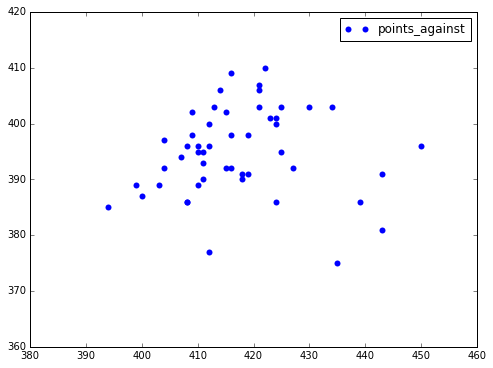

In [74]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df_topfifty['points_for'], df_topfifty['points_against'], marker='o', linestyle='', markeredgewidth=0)
ax.set_xlim([380, 460])
ax.set_ylim([360, 420])
ax.legend()

plt.savefig("Richards.pdf", transparent=True)